In [16]:
# Load the ISLR package and get structure of the dataset
library(ISLR)
library(class)
library(ggplot2)
library(dplyr)
library(caTools)

# check the head of the dataset 7 and get structure
print(head(iris))
str(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa
'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [17]:
# check for missing values and variance
print(any(is.na(iris)))
var(iris[, 1])
var(iris[, 2])
var(iris[, 3])
var(iris[, 4])

[1] FALSE


[1] 0.6856935

[1] 0.1899794

[1] 3.116278

[1] 0.5810063

In [18]:
# Standardize the features
stand.features <- scale(iris[1:4])
print(var(stand.features))
print(var(stand.features)[,1])

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    1.0000000  -0.1175698    0.8717538   0.8179411
Sepal.Width    -0.1175698   1.0000000   -0.4284401  -0.3661259
Petal.Length    0.8717538  -0.4284401    1.0000000   0.9628654
Petal.Width     0.8179411  -0.3661259    0.9628654   1.0000000
Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   1.0000000   -0.1175698    0.8717538    0.8179411 


In [20]:
# Combine the standardized features with the class variable
iris1 <- cbind(stand.features, iris[5])
print(head(iris1))

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1   -0.8976739  1.01560199    -1.335752   -1.311052  setosa
2   -1.1392005 -0.13153881    -1.335752   -1.311052  setosa
3   -1.3807271  0.32731751    -1.392399   -1.311052  setosa
4   -1.5014904  0.09788935    -1.279104   -1.311052  setosa
5   -1.0184372  1.24503015    -1.335752   -1.311052  setosa
6   -0.5353840  1.93331463    -1.165809   -1.048667  setosa


In [22]:
# Set a seed for reproducibility
set.seed(101)

# Split the dataset
sample <- sample.split(iris1$Species, SplitRatio = .70)

# Create training set
train <- subset(iris1, sample == TRUE)

# Create testing set
test <- subset(iris1, sample == FALSE)

In [23]:
# Run knn with k = 1 and get misclassification rate
predicted.species <- knn(train[1:4], test[1:4], train$Species, k = 1)
print(predicted.species)
mean(test$Species != predicted.species)


 [1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor virginica  versicolor versicolor versicolor
[25] versicolor versicolor virginica  versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica


[1] 0.04444444

 [1] 0.04444444 0.02222222 0.02222222 0.02222222 0.02222222 0.02222222
 [7] 0.06666667 0.06666667 0.04444444 0.02222222


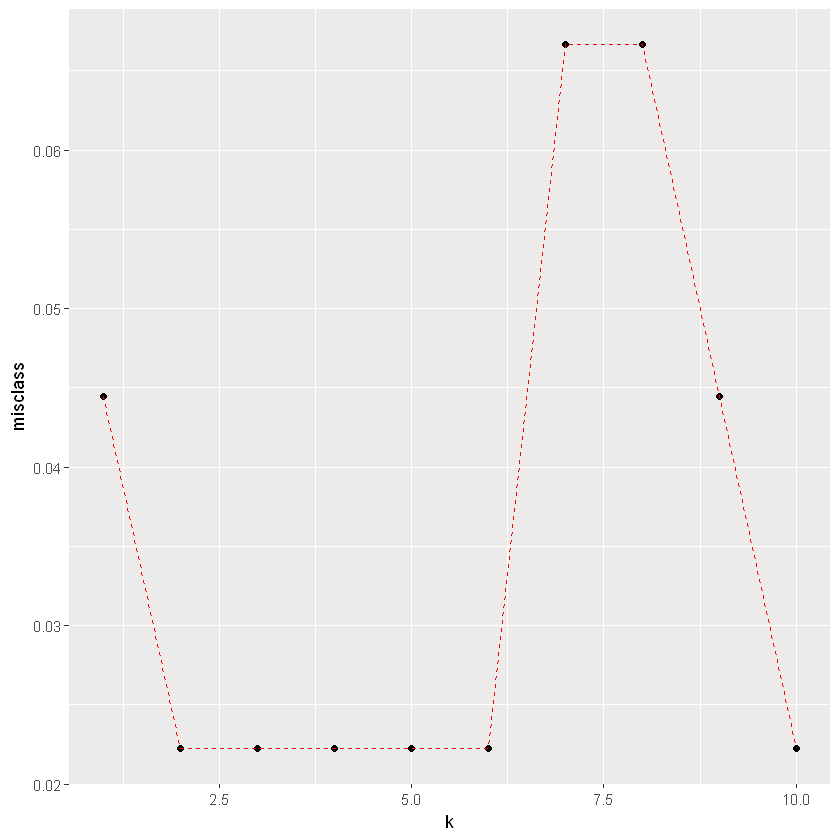

In [26]:
# Identify the best k and plot misclassification error
k <- 1:10
misclass <- rep(0, 10)
for (i in 1:10) {
    set.seed(101)
    predicted.species <- knn(train[1:4], test[1:4], train$Species, k = i)
    misclass[i] <- mean(test$Species != predicted.species)
}
print(misclass)

ggplot(data = data.frame(k, misclass), aes(x = k, y = misclass)) +
    geom_point() +
    geom_line(lty = "dashed", color = "red")

# Error is lowest between k = 2 to ~6